In [1]:
from IPython.core.display import display, HTML # for some notebook formatting.

import mlrose_hiive
import numpy as np
import logging
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


from ast import literal_eval
import chess

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from mlrose_hiive import QueensGenerator, MaxKColorGenerator, TSPGenerator
from mlrose_hiive import SARunner, GARunner, MIMICRunner, RHCRunner

from util.utils import run_experiment_multi_seed, runner_results_to_stats, plot_fitness_iteration, get_optimal_hyperparameters
from util.utils import plot_fitness_vs_hyperparameter, plot_HP_heatmap, plot_fitness_fevals

# switch off the chatter
logging.basicConfig(level=logging.WARNING)


%load_ext autoreload
%autoreload 2

# Fixed random seed for reproducibility on random optimization problems
FIXED_SEED = 42
np.random.seed(FIXED_SEED)
# Random Seeds for reproducibility
RANDOM_SEEDS = [1, 2, 3, 4, 5]

/tmp/ipykernel_40627/3700617446.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML # for some notebook formatting.


189


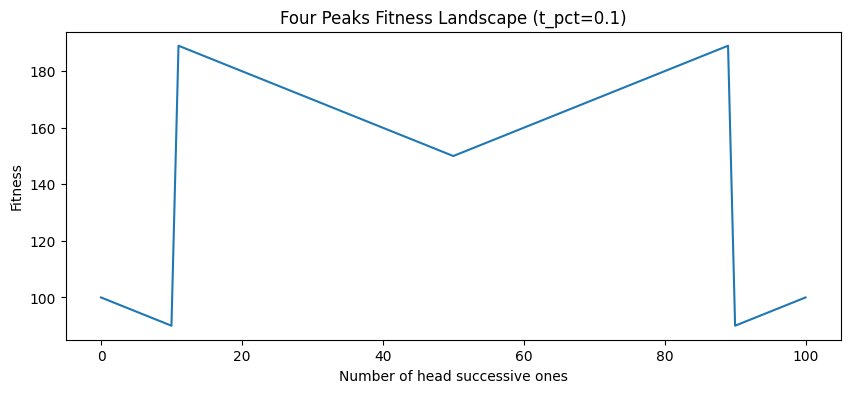

In [2]:
fitness = mlrose_hiive.FourPeaks(t_pct=0.1)
fitnesses = []
bit_string_length = 100
for i in range(bit_string_length+1):
    bit_string = np.hstack((np.ones(bit_string_length-i), np.zeros(i)))
    # print(bit_string, fitness.evaluate(bit_string))
    fitnesses.append(fitness.evaluate(bit_string))

# plot the fitness landscape
plt.figure(figsize=(10, 4))
plt.plot(fitnesses)
plt.xlabel('Number of head successive ones')
plt.ylabel('Fitness')
plt.title('Four Peaks Fitness Landscape (t_pct=0.1)')
plt.savefig('figures/four_peaks_landscape.png', dpi=300, bbox_inches='tight')
print(max(fitnesses))

In [3]:
# generate a np array of 15 ones followed by 15 zeros
best_1 = np.hstack((np.ones(44),np.zeros(6)))
best_2 = np.hstack((np.ones(26),np.zeros(4)))

fitness.evaluate(best_1)
fitness.evaluate(best_2)

56

In [4]:
fitness = mlrose_hiive.FourPeaks(t_pct = 0.099)
problem_easy = mlrose_hiive.DiscreteOpt(length = 30, fitness_fn = fitness, maximize=True, max_val=2)
problem_medium = mlrose_hiive.DiscreteOpt(length = 50, fitness_fn = fitness, maximize=True, max_val=2)
problem_hard = mlrose_hiive.DiscreteOpt(length = 100, fitness_fn = fitness, maximize=True, max_val=2)

# 2. Testing

In [31]:
rhc = RHCRunner(
                problem=problem_hard,
                experiment_name='rhc',
                output_directory=None,
                seed=FIXED_SEED,
                iteration_list= np.arange(0, 10000, 10),
                restart_list=[0],
                max_attempts=1000,
                )

rhc_results = run_experiment_multi_seed(rhc, RANDOM_SEEDS)



Runner 0 seed: 1
Runner 1 seed: 2
Runner 2 seed: 3
Runner 3 seed: 4
Runner 4 seed: 5


<Figure size 640x480 with 0 Axes>

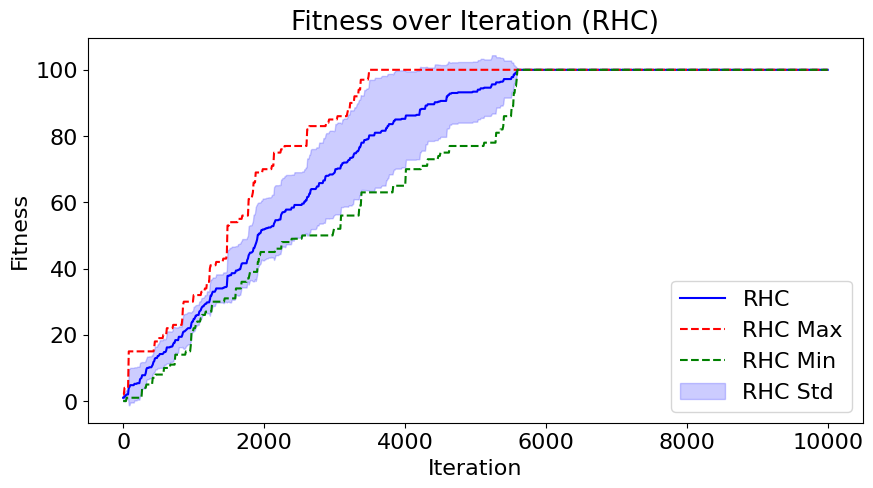

Best Fitness: 100.0


In [32]:
rhc_mean, rhc_std, rhc_min, rhc_max = runner_results_to_stats(rhc_results)
plot_fitness_iteration(rhc_mean, rhc_std, rhc_min, rhc_max, "RHC", "TSP")
print(f'Best Fitness: {rhc_mean["Fitness"].max()}')

Experiments:   0%|          | 0/1 [00:00<?, ?it/s]

Experiments: 100%|██████████| 1/1 [13:29<00:00, 809.10s/it]


<Figure size 640x480 with 0 Axes>

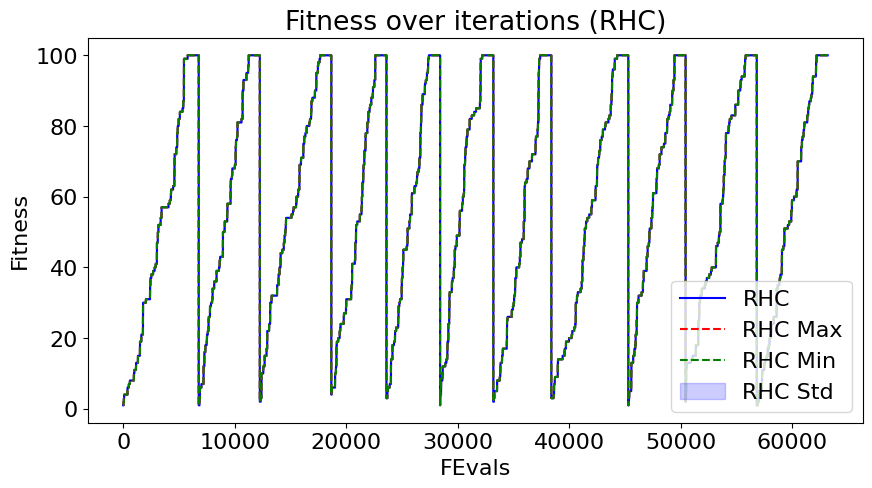

Best Fitness: 100.0


In [5]:
rhc = RHCRunner(
                problem=problem_hard,
                experiment_name='rhc',
                output_directory=None,
                seed=FIXED_SEED,
                iteration_list= np.arange(0, 10000, 10),
                restart_list=[10],
                max_attempts=1000,
                )

# rhc_results = run_experiment_multi_seed(rhc, RANDOM_SEEDS)
rhc_results = rhc.run()
rhc_results = [rhc_results]
rhc_mean, rhc_std, rhc_min, rhc_max = runner_results_to_stats(rhc_results)
plot_fitness_fevals(rhc_mean, rhc_std, rhc_min, rhc_max, "RHC", "TSP")
print(f'Best Fitness: {rhc_mean["Fitness"].max()}')


In [6]:
rhc_mean['Time'].max()

808.9852420880015

<Figure size 640x480 with 0 Axes>

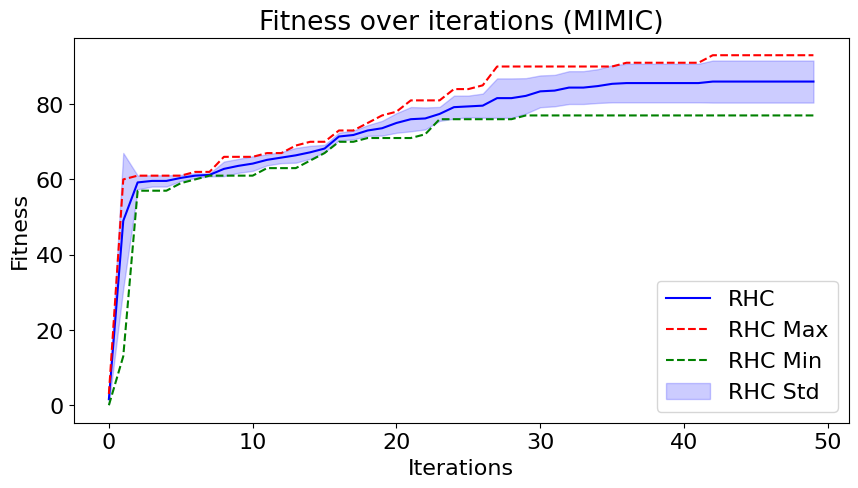

<Figure size 640x480 with 0 Axes>

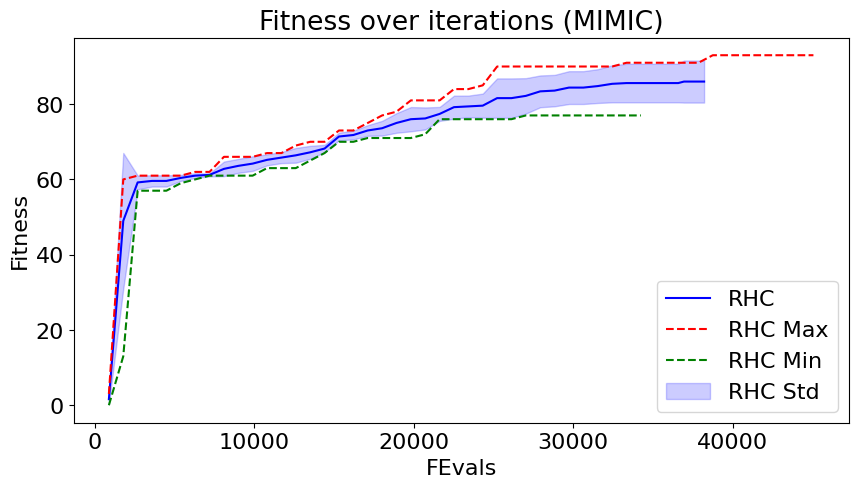

Best Fitness: 86.0
Best Fitness: 93.0


In [55]:
mmc = MIMICRunner(problem=problem_medium,
                    experiment_name='tsp_mimic',
                    output_directory=None, # note: specify an output directory to have results saved to disk
                    seed=FIXED_SEED,
                    iteration_list=np.arange(0, 100, 1),
                    max_attempts=10,
                    population_sizes=[900],
                    keep_percent_list=[0.3],
                    use_fast_mimic=True
                    )

mmc_results = run_experiment_multi_seed(mmc, RANDOM_SEEDS)
mmc_mean, mmc_std, mmc_min, mmc_max = runner_results_to_stats(mmc_results)
plot_fitness_iteration(mmc_mean, mmc_std, mmc_min, mmc_max, "MIMIC", "TSP")
plot_fitness_fevals(mmc_mean, mmc_std, mmc_min, mmc_max, "MIMIC", "TSP")
print(f'Best Fitness: {mmc_mean["Fitness"].max()}')
print(f'Best Fitness: {mmc_max["Fitness"].max()}')


<Figure size 640x480 with 0 Axes>

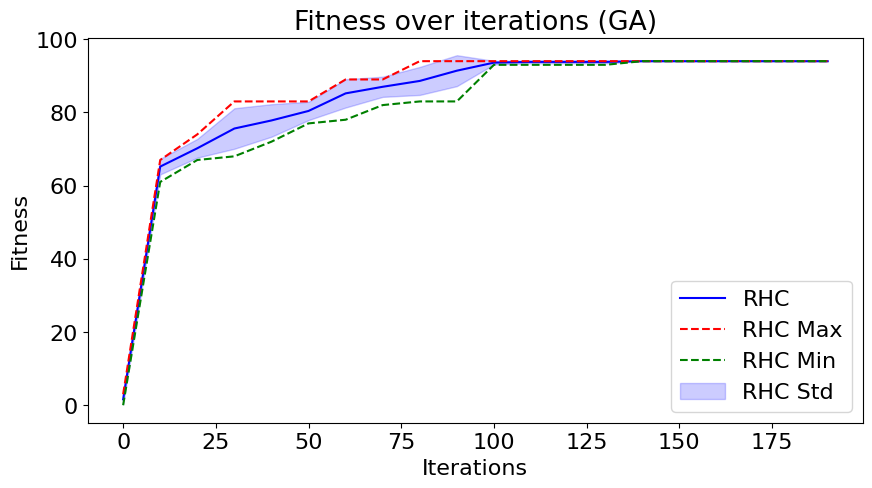

<Figure size 640x480 with 0 Axes>

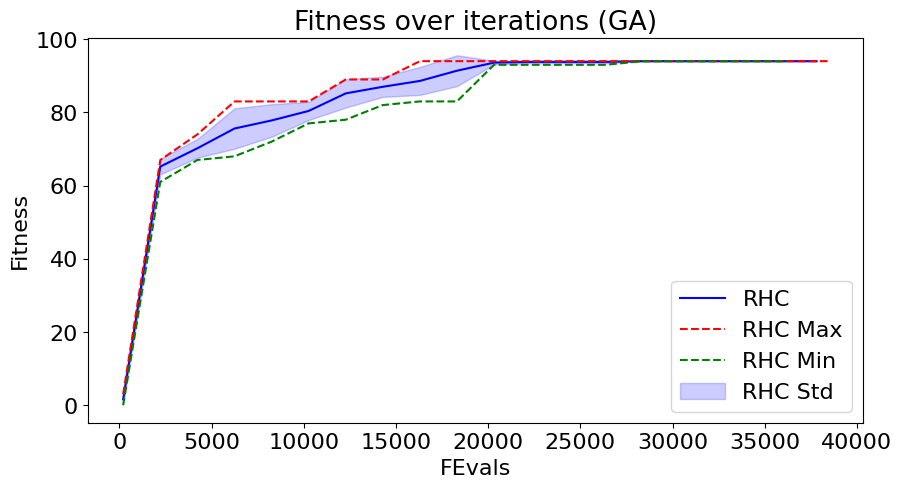

Best Fitness: 94.0


In [56]:
ga = GARunner(problem=problem_medium,
              experiment_name='tsp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=FIXED_SEED,
              iteration_list=np.arange(0, 200, 10),
              max_attempts=100,
              population_sizes=[200],
              mutation_rates=[0.05]
            )

ga_results = run_experiment_multi_seed(ga, RANDOM_SEEDS)

ga_mean, ga_std, ga_min, ga_max = runner_results_to_stats(ga_results)
plot_fitness_iteration(ga_mean, ga_std, ga_min, ga_max, "GA", "TSP")
plot_fitness_fevals(ga_mean, ga_std, ga_min, ga_max, "GA", "TSP")
print(f'Best Fitness: {ga_mean["Fitness"].max()}')


100%|██████████| 1/1 [00:05<00:00,  5.10s/it]


<Figure size 640x480 with 0 Axes>

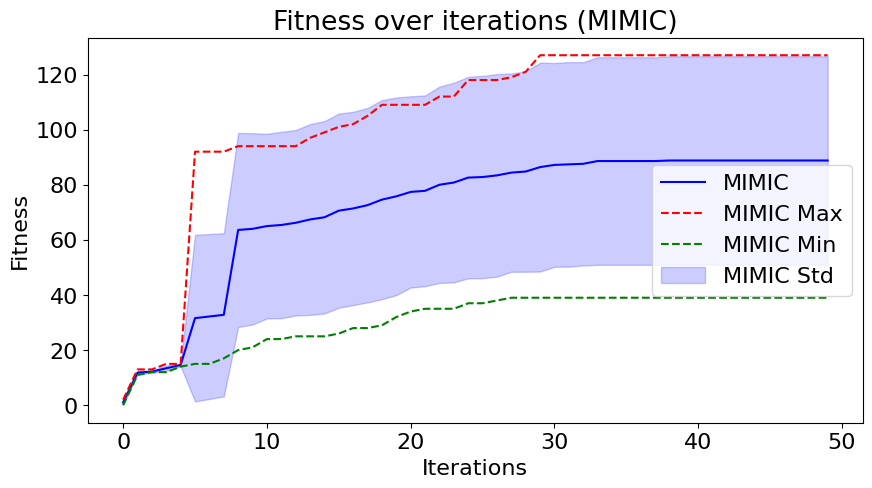

<Figure size 640x480 with 0 Axes>

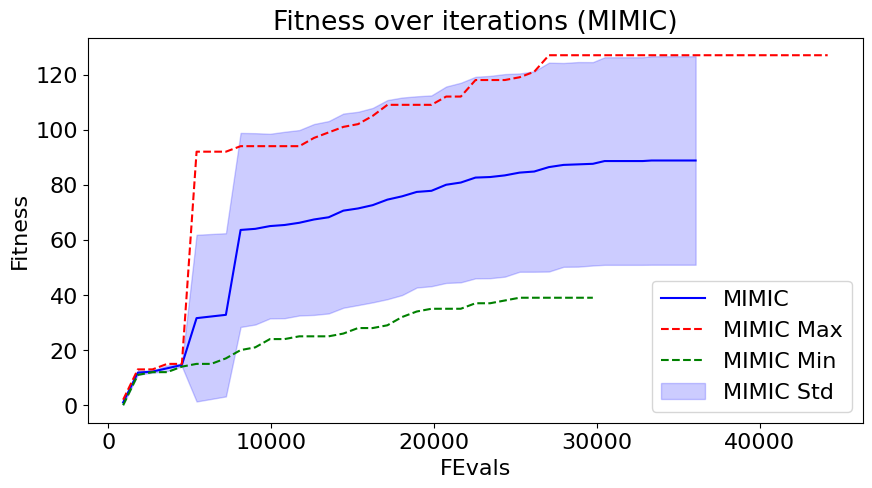

Best Fitness: 88.8
Best Fitness: 127.0


In [10]:
mmc = MIMICRunner(problem=problem_hard,
                    experiment_name='tsp_mimic',
                    output_directory=None, # note: specify an output directory to have results saved to disk
                    seed=FIXED_SEED,
                    iteration_list=np.arange(0, 50, 1),
                    max_attempts=10,
                    population_sizes=[900],
                    keep_percent_list=[0.3],
                    use_fast_mimic=True
                    )

mmc_results = run_experiment_multi_seed(mmc, RANDOM_SEEDS)
mmc_mean, mmc_std, mmc_min, mmc_max = runner_results_to_stats(mmc_results)
plot_fitness_iteration(mmc_mean, mmc_std, mmc_min, mmc_max, "MIMIC", "TSP")
plot_fitness_fevals(mmc_mean, mmc_std, mmc_min, mmc_max, "MIMIC", "TSP")
print(f'Best Fitness: {mmc_mean["Fitness"].max()}')
print(f'Best Fitness: {mmc_max["Fitness"].max()}')


<Figure size 640x480 with 0 Axes>

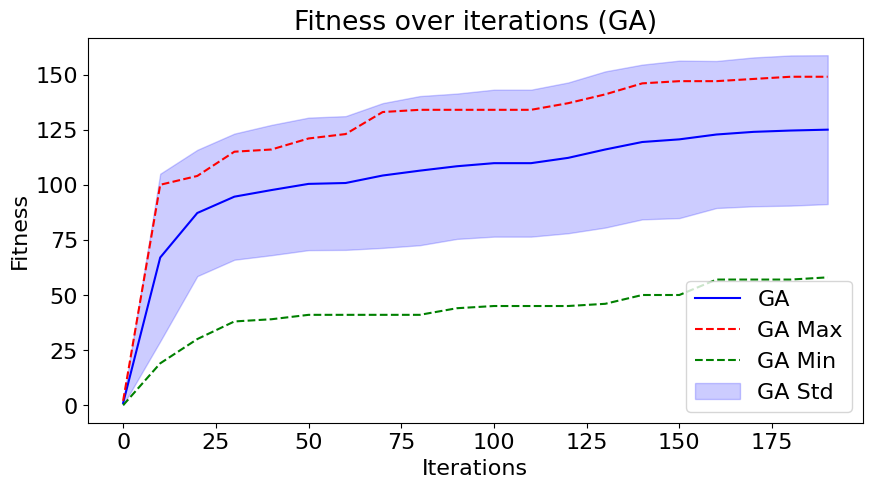

<Figure size 640x480 with 0 Axes>

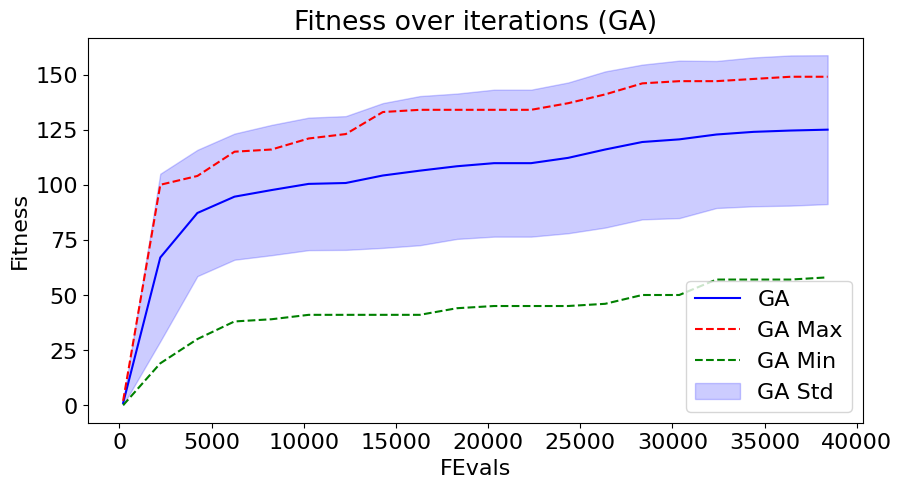

Best Fitness: 125.0
Best Fitness: 149.0


In [11]:
ga = GARunner(problem=problem_hard,
              experiment_name='tsp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=FIXED_SEED,
              iteration_list=np.arange(0, 200, 10),
              max_attempts=100,
              population_sizes=[200],
              mutation_rates=[0.05]
            )

ga_results = run_experiment_multi_seed(ga, RANDOM_SEEDS)

ga_mean, ga_std, ga_min, ga_max = runner_results_to_stats(ga_results)
plot_fitness_iteration(ga_mean, ga_std, ga_min, ga_max, "GA", "TSP")
plot_fitness_fevals(ga_mean, ga_std, ga_min, ga_max, "GA", "TSP")
print(f'Best Fitness: {ga_mean["Fitness"].max()}')
print(f'Best Fitness: {ga_max["Fitness"].max()}')


# 3. Hyperparameter Tuning

## 3.1 MIMIC

In [5]:
mmc = MIMICRunner(problem=problem_hard,
                    experiment_name='tsp_mimic',
                    output_directory=None, # note: specify an output directory to have results saved to disk
                    seed=FIXED_SEED,
                    iteration_list=2**np.arange(8),
                    max_attempts=10,
                    population_sizes=[2500],
                    keep_percent_list=np.arange(0.00, 0.1, 0.01),
                    use_fast_mimic=True
                    )

mmc_results = run_experiment_multi_seed(mmc, RANDOM_SEEDS)
# mmc_results = mmc.run()
# mmc_results = [mmc_results]


import pickle
with open('4K_GA_HP.pkl', 'wb') as f:
    pickle.dump(mmc_results, f)

Runner 0 seed: 1
Runner 1 seed: 2
Runner 2 seed: 3
Runner 3 seed: 4
Runner 4 seed: 5


Experiments: 100%|██████████| 10/10 [04:37<00:00, 27.78s/it]


In [6]:
import pickle
with open('4K_GA_HP.pkl', 'rb') as f:
    mmc_results = pickle.load(f)

mmc_hp_mean, mmc_hp_std, mmc_hp_min, mmc_hp_max = runner_results_to_stats(mmc_results)

mmc_optimal_HP = get_optimal_hyperparameters(mmc_hp_mean, ['Population Size', 'Keep Percent'])
mmc_optimal_HP

{'Population Size': 2500, 'Keep Percent': 0.07}

Keep Percent
Population Size = 2500 Fitness: 170.0 (+/- 44.02090412519943), Time: 20.641125911400014


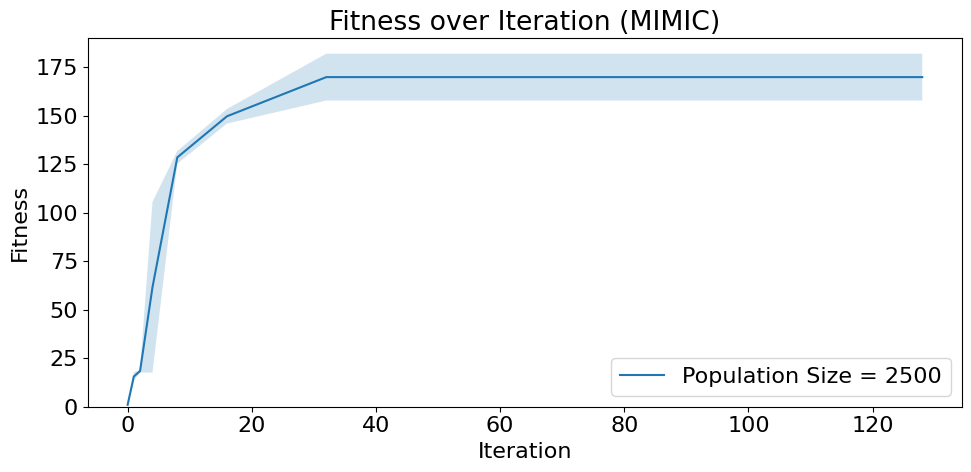

Population Size
Keep Percent = 0.0 Fitness: 12.4 (+/- 1.4966629547095764), Time: 30.497805945400614
Keep Percent = 0.01 Fitness: 109.8 (+/- 38.41145662429375), Time: 25.59125498439971
Keep Percent = 0.02 Fitness: 152.4 (+/- 37.02431633399866), Time: 25.673808940400342
Keep Percent = 0.03 Fitness: 133.6 (+/- 44.85799817200942), Time: 21.948854566400406
Keep Percent = 0.04 Fitness: 160.8 (+/- 44.93105830046739), Time: 26.6648001345995
Keep Percent = 0.05 Fitness: 128.0 (+/- 47.5646927878232), Time: 24.764013087400237
Keep Percent = 0.06 Fitness: 120.6 (+/- 42.570412260160225), Time: 20.020797810999646
Keep Percent = 0.07 Fitness: 170.0 (+/- 44.02090412519943), Time: 20.641125911400014
Keep Percent = 0.08 Fitness: 150.8 (+/- 43.56328729561165), Time: 34.24755797340113
Keep Percent = 0.09 Fitness: 131.0 (+/- 45.98695467195018), Time: 26.42038673880088


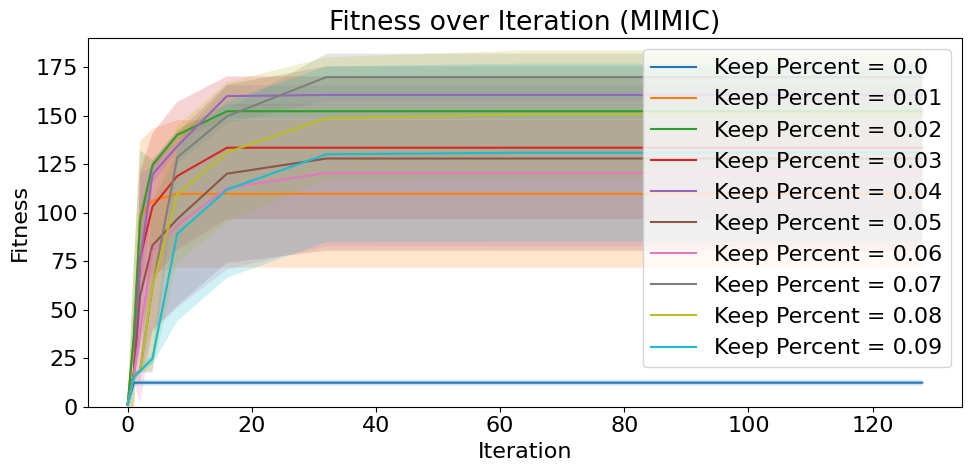

In [11]:
for key in mmc_optimal_HP.keys():
    plot_fitness_vs_hyperparameter(mmc_hp_mean, mmc_hp_std, mmc_optimal_HP, key, "MIMIC", "TSP", x_axis="Iteration", y_lim=(0,190))

In [12]:
print(f'Best Fitness: {mmc_hp_mean["Fitness"].max()}')
print(f'Best Fitness: {mmc_hp_max["Fitness"].max()}')

Best Fitness: 170.0
Best Fitness: 184.0


<Figure size 640x480 with 0 Axes>

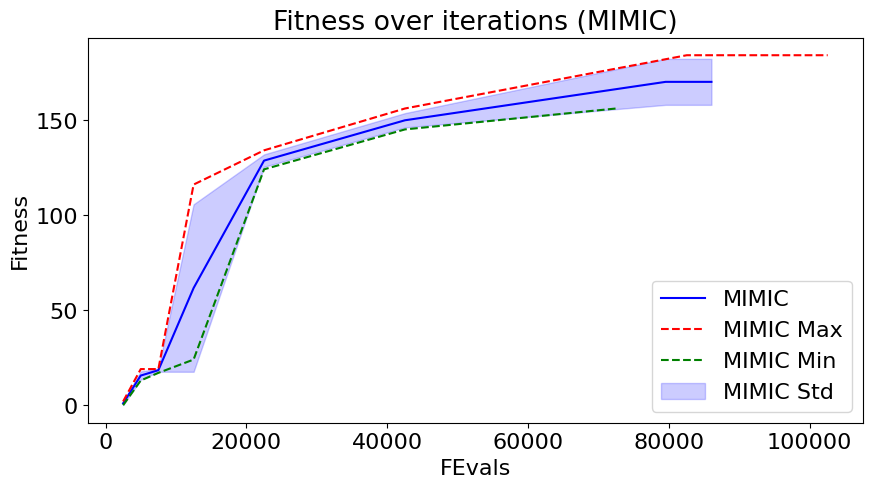

In [13]:
# select run with optimal hyperparameters
best_mmc = mmc_hp_mean[(mmc_hp_mean['Keep Percent'] == mmc_optimal_HP['Keep Percent']) & (mmc_hp_mean['Population Size'] == mmc_optimal_HP['Population Size'])]
best_std = mmc_hp_std[(mmc_hp_mean['Keep Percent'] == mmc_optimal_HP['Keep Percent']) & (mmc_hp_mean['Population Size'] == mmc_optimal_HP['Population Size'])]
best_min = mmc_hp_min[(mmc_hp_mean['Keep Percent'] == mmc_optimal_HP['Keep Percent']) & (mmc_hp_mean['Population Size'] == mmc_optimal_HP['Population Size'])]
best_max = mmc_hp_max[(mmc_hp_mean['Keep Percent'] == mmc_optimal_HP['Keep Percent']) & (mmc_hp_mean['Population Size'] == mmc_optimal_HP['Population Size'])]
plot_fitness_fevals(best_mmc, best_std, best_min, best_max, "MIMIC", "TSP")

## 3.2 GA

In [5]:
ga = GARunner(problem=problem_hard,
                experiment_name='tsp_ga',
                output_directory=None, # note: specify an output directory to have results saved to disk
                seed=FIXED_SEED,
                iteration_list=2 ** np.arange(11),
                max_attempts=30,
                population_sizes=np.arange(100, 1000, 50),
                mutation_rates=np.arange(0.01, 0.5, 0.05)
                )

ga_results = run_experiment_multi_seed(ga, RANDOM_SEEDS)

import pickle
with open('4K_GA_HP.pkl', 'wb') as f:
    pickle.dump(ga_results, f)

100%|██████████| 180/180 [19:57<00:00,  6.65s/it]


In [2]:
import pickle
with open('4K_GA_HP.pkl', 'rb') as f:
    ga_results = pickle.load(f)

ga_hp_mean, ga_hp_std, ga_hp_min, ga_hp_max = runner_results_to_stats(ga_results)

best_it = get_optimal_hyperparameters(ga_hp_mean)
ga_optimal_HP = {}
ga_optimal_HP['Mutation Rate'] = best_it['Mutation Rate']
ga_optimal_HP['Population Size'] = best_it['Population Size']
ga_optimal_HP

NameError: name 'runner_results_to_stats' is not defined

Population Size
Mutation Rate = 0.01 Fitness: 87.8
Mutation Rate = 0.060000000000000005 Fitness: 109.4
Mutation Rate = 0.11 Fitness: 96.4
Mutation Rate = 0.16000000000000003 Fitness: 110.4
Mutation Rate = 0.21000000000000002 Fitness: 115.2
Mutation Rate = 0.26 Fitness: 110.2
Mutation Rate = 0.31000000000000005 Fitness: 148.2
Mutation Rate = 0.36000000000000004 Fitness: 151.0
Mutation Rate = 0.41000000000000003 Fitness: 136.8
Mutation Rate = 0.46 Fitness: 136.8


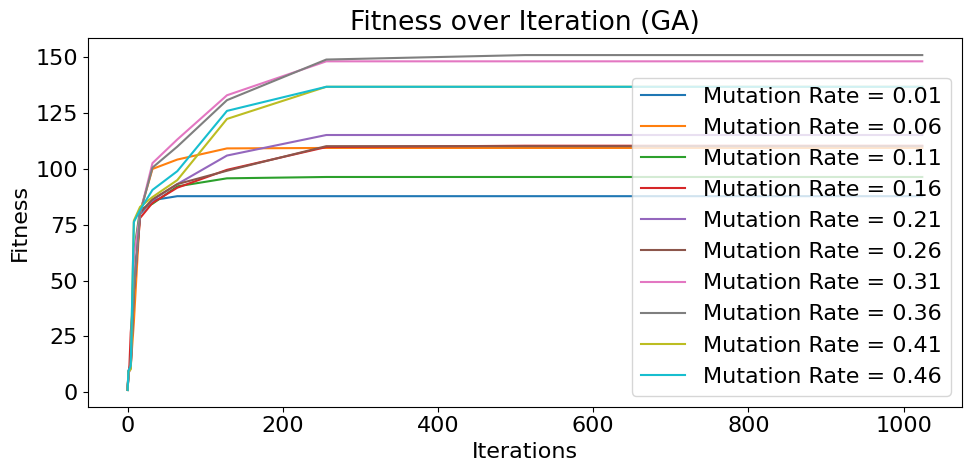

Mutation Rate
Population Size = 100 Fitness: 151.0
Population Size = 150 Fitness: 151.0
Population Size = 200 Fitness: 151.0
Population Size = 250 Fitness: 151.0
Population Size = 300 Fitness: 151.0
Population Size = 350 Fitness: 151.0
Population Size = 400 Fitness: 151.0
Population Size = 450 Fitness: 151.0
Population Size = 500 Fitness: 151.0
Population Size = 550 Fitness: 151.0
Population Size = 600 Fitness: 151.0
Population Size = 650 Fitness: 151.0
Population Size = 700 Fitness: 151.0
Population Size = 750 Fitness: 151.0
Population Size = 800 Fitness: 151.0
Population Size = 850 Fitness: 151.0
Population Size = 900 Fitness: 151.0
Population Size = 950 Fitness: 151.0


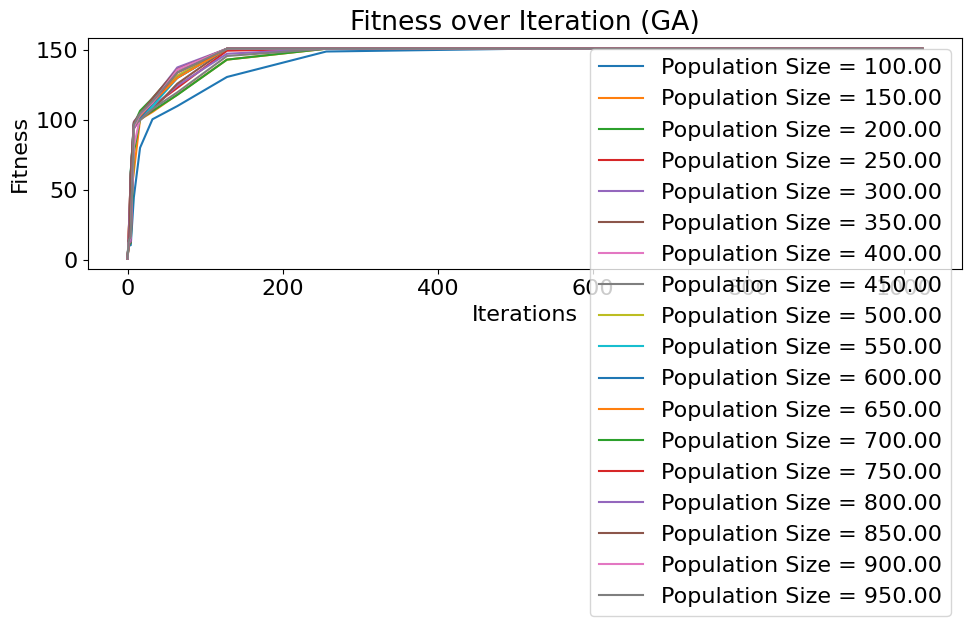

In [10]:
for key in ga_optimal_HP.keys():
    plot_fitness_vs_hyperparameter(ga_hp_mean, ga_hp_std, ga_optimal_HP, key, "GA", "TSP")

##  3.3 SA

In [25]:
sa = SARunner(problem=problem_hard,
              experiment_name='sa',
              output_directory=None, # note: specify an output directory to have results saved to disk "experiments/TSP_SA_HP"
              seed=FIXED_SEED,
              iteration_list=np.arange(0, 10000, 100),
              max_attempts=300,
              temperature_list=[1,2,5,10,20],
              decay_list=[mlrose_hiive.GeomDecay, mlrose_hiive.ExpDecay, mlrose_hiive.ArithDecay])

sa_results = run_experiment_multi_seed(sa, [1,2,3,4,5,6,7,8,9,10])

import pickle
with open('experiments/4PEAKS_SA_HP_hard.pkl', 'wb') as f:
    pickle.dump(sa_results, f)


Runner 0 seed: 1
Runner 1 seed: 2
Runner 2 seed: 3
Runner 3 seed: 4
Runner 4 seed: 5
Runner 5 seed: 6
Runner 6 seed: 7
Runner 7 seed: 8
Runner 8 seed: 9
Runner 9 seed: 10


{'schedule_init_temp': 10, 'schedule_type': 'geometric'}
Best Fitness: 117.7, MAX Fitness: 189.0


<Figure size 640x480 with 0 Axes>

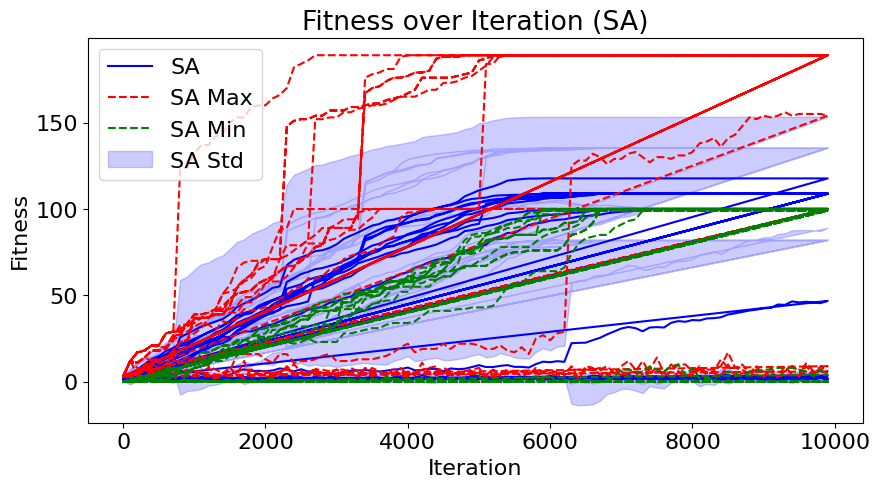

schedule_type
schedule_init_temp = 1 Fitness: 108.9 (+/- 33.13366867704208), Time: 17.758698629799618
schedule_init_temp = 2 Fitness: 108.9 (+/- 28.96566933457606), Time: 18.021147455799657
schedule_init_temp = 5 Fitness: 108.9 (+/- 33.68382401094033), Time: 20.64497950300065
schedule_init_temp = 10 Fitness: 117.7 (+/- 49.84816947491653), Time: 17.981880104600712
schedule_init_temp = 20 Fitness: 108.8 (+/- 34.95940502926216), Time: 22.336440340999978


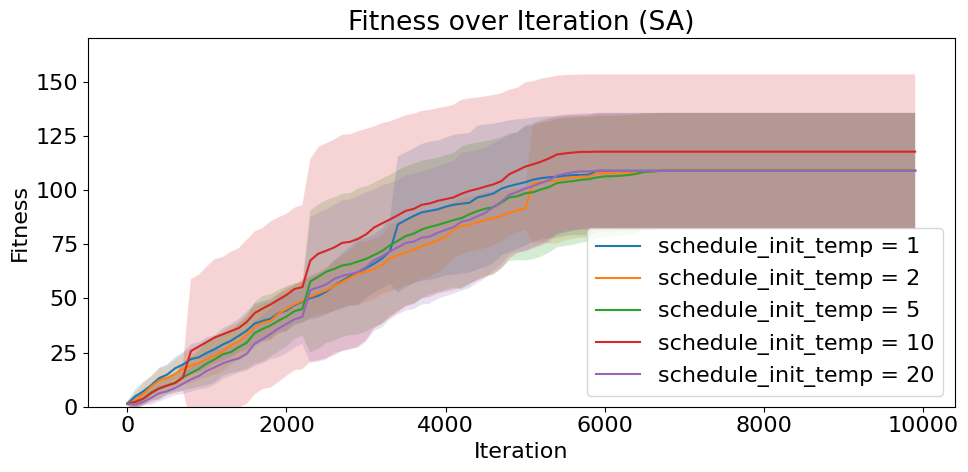

schedule_init_temp
schedule_type = geometric Fitness: 117.7 (+/- 49.84816947491653), Time: 17.981880104600712
schedule_type = exponential Fitness: 108.9 (+/- 34.677946882709186), Time: 18.582619647899264
schedule_type = arithmetic Fitness: 3.8 (+/- 3.57211421989835), Time: 53.705532106100144


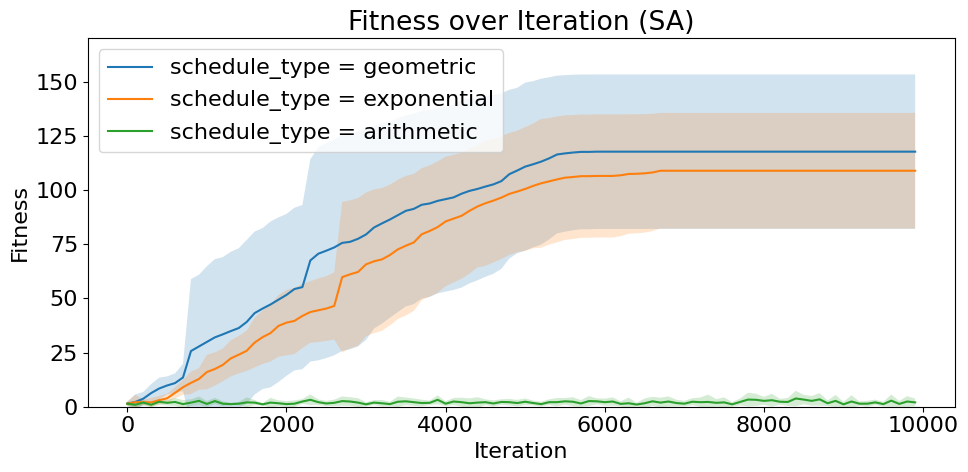

In [26]:
import pickle
with open('experiments/4PEAKS_SA_HP_hard.pkl', 'rb') as f:
    sa_results = pickle.load(f)

sa_hp_mean, sa_hp_std, sa_hp_min, sa_hp_max = runner_results_to_stats(sa_results)
sa_optimal_HP = get_optimal_hyperparameters(sa_hp_mean, ['schedule_init_temp', 'schedule_type'])
print(sa_optimal_HP)
print(f'Best Fitness: {sa_hp_mean["Fitness"].max()}, MAX Fitness: {sa_hp_max["Fitness"].max()}')
plot_fitness_iteration(sa_hp_mean, sa_hp_std, sa_hp_min, sa_hp_max, "SA", "TSP")
for key in sa_optimal_HP.keys():
    plot_fitness_vs_hyperparameter(sa_hp_mean, sa_hp_std, sa_optimal_HP, key, "SA", "TSP", y_lim=(0,170), show_std=True)

Best Fitness Avg: 117.7
Best Fitness MAX: 189.0
Best Iteration: 7664.7
Best Time: 17.981880104600712


<Figure size 640x480 with 0 Axes>

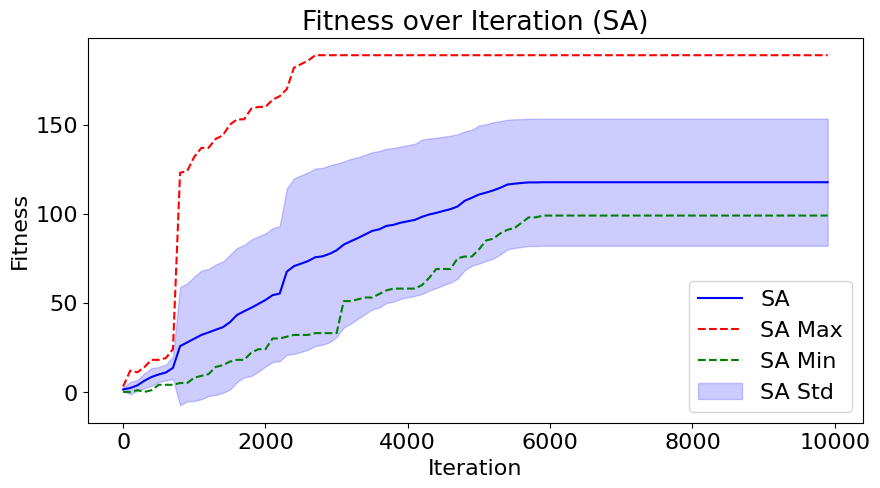

In [27]:
best_run = sa_hp_mean[(sa_hp_mean['schedule_init_temp'] == sa_optimal_HP['schedule_init_temp']) & (sa_hp_mean['schedule_type'] == sa_optimal_HP['schedule_type'])]
best_max = sa_hp_max[(sa_hp_mean['schedule_init_temp'] == sa_optimal_HP['schedule_init_temp']) & (sa_hp_mean['schedule_type'] == sa_optimal_HP['schedule_type'])]
best_min = sa_hp_min[(sa_hp_mean['schedule_init_temp'] == sa_optimal_HP['schedule_init_temp']) & (sa_hp_mean['schedule_type'] == sa_optimal_HP['schedule_type'])]
best_std = sa_hp_std[(sa_hp_mean['schedule_init_temp'] == sa_optimal_HP['schedule_init_temp']) & (sa_hp_mean['schedule_type'] == sa_optimal_HP['schedule_type'])]
print(f'Best Fitness Avg: {best_run["Fitness"].max()}')
print(f'Best Fitness MAX: {best_max["Fitness"].max()}')
print(f'Best Iteration: {best_run["FEvals"].max()}')
print(f'Best Time: {best_run["Time"].max()}')

plot_fitness_iteration(best_run, best_std, best_min, best_max, "SA", "TSP")

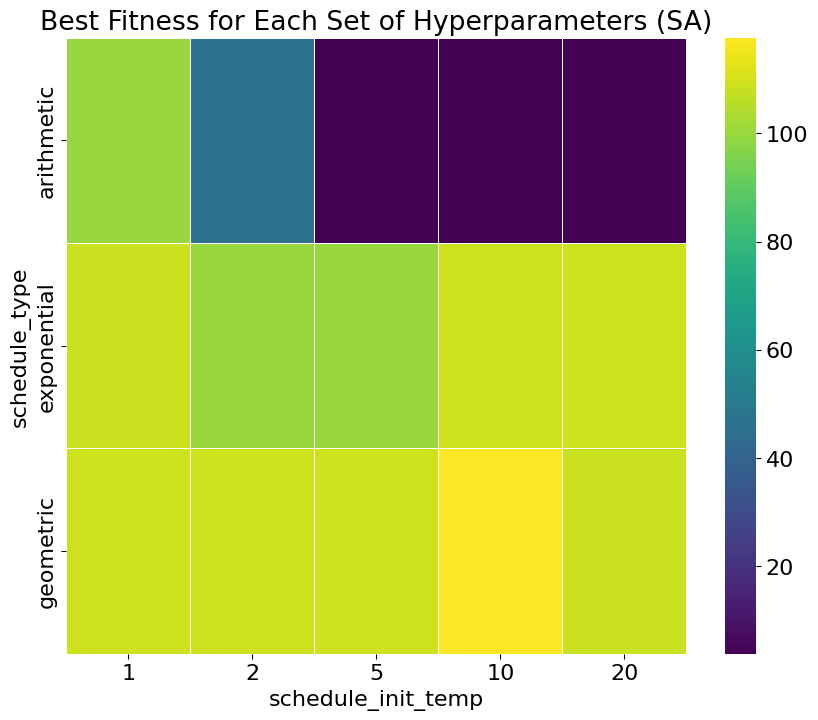

In [28]:
plot_HP_heatmap(sa_hp_mean, "schedule_init_temp", "schedule_type", "SA", "4P")

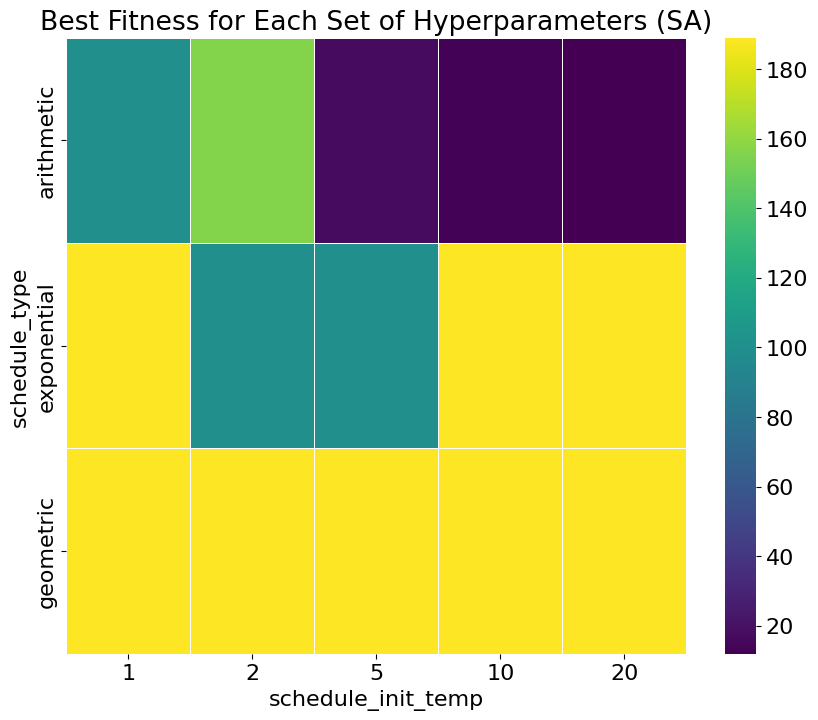

In [29]:
plot_HP_heatmap(sa_hp_max, "schedule_init_temp", "schedule_type", "SA", "4PMAX")

In [30]:
best_run = sa_hp_mean[(sa_hp_mean['schedule_init_temp'] == sa_optimal_HP['schedule_init_temp']) & (sa_hp_mean['schedule_type'] == sa_optimal_HP['schedule_type'])]
best_max = sa_hp_max[(sa_hp_mean['schedule_init_temp'] == sa_optimal_HP['schedule_init_temp']) & (sa_hp_mean['schedule_type'] == sa_optimal_HP['schedule_type'])]
best_std = sa_hp_std[(sa_hp_mean['schedule_init_temp'] == sa_optimal_HP['schedule_init_temp']) & (sa_hp_mean['schedule_type'] == sa_optimal_HP['schedule_type'])]
print(f'Best Fitness Avg: {best_run["Fitness"].max()}')
print(f'Best Fitness MAX: {best_max["Fitness"].max()}')
print(f'Best Iteration: {best_run["FEvals"].max()}')
print(f'Best Time: {best_run["Time"].max()}')
print(f'Best STD: {best_std["Fitness"].max()}')

Best Fitness Avg: 117.7
Best Fitness MAX: 189.0
Best Iteration: 7664.7
Best Time: 17.981880104600712
Best STD: 49.84816947491653


### 3.3.2 SA Iteration impact on mean and max fitness

In [50]:
sa = SARunner(problem=problem_hard,
              experiment_name='sa',
              output_directory=None, # note: specify an output directory to have results saved to disk "experiments/TSP_SA_HP"
              seed=FIXED_SEED,
              iteration_list=np.arange(0, 20000, 100),
              max_attempts=2000,
              temperature_list=[10],
              decay_list=[mlrose_hiive.GeomDecay])

sa_results = run_experiment_multi_seed(sa, [1,2,3,4,5,6,7,8,9,10])

import pickle
with open('experiments/4PEAKS_SA_HP_hard.pkl', 'wb') as f:
    pickle.dump(sa_results, f)

sa_hp_mean, sa_hp_std, sa_hp_min, sa_hp_max = runner_results_to_stats(sa_results)

Runner 0 seed: 1
Runner 1 seed: 2
Runner 2 seed: 3
Runner 3 seed: 4
Runner 4 seed: 5
Runner 5 seed: 6
Runner 6 seed: 7
Runner 7 seed: 8
Runner 8 seed: 9
Runner 9 seed: 10


In [52]:
best_run = sa_hp_mean[(sa_hp_mean['schedule_init_temp'] == sa_optimal_HP['schedule_init_temp']) & (sa_hp_mean['schedule_type'] == sa_optimal_HP['schedule_type'])]
best_max = sa_hp_max[(sa_hp_mean['schedule_init_temp'] == sa_optimal_HP['schedule_init_temp']) & (sa_hp_mean['schedule_type'] == sa_optimal_HP['schedule_type'])]
best_std = sa_hp_std[(sa_hp_mean['schedule_init_temp'] == sa_optimal_HP['schedule_init_temp']) & (sa_hp_mean['schedule_type'] == sa_optimal_HP['schedule_type'])]
print(f'Best Fitness Avg: {best_run["Fitness"].max()}')
print(f'Best Fitness MAX: {best_max["Fitness"].max()}')
print(f'Best STD: {best_std["Fitness"].max()}')
print(f'Best Iteration: {best_run["FEvals"].max()}')
print(f'Best Time: {best_run["Time"].max()}')

Best Fitness Avg: 117.8
Best Fitness MAX: 189.0
Best STD: 49.84816947491653
Best Iteration: 9415.2
Best Time: 17.460322793800877


### 3.3.3 SA Medium

In [53]:
sa = SARunner(problem=problem_medium,
              experiment_name='sa',
              output_directory=None, # note: specify an output directory to have results saved to disk "experiments/TSP_SA_HP"
              seed=FIXED_SEED,
              iteration_list=np.arange(0, 10000, 100),
              max_attempts=300,
              temperature_list=[1,2,5,10,20],
              decay_list=[mlrose_hiive.GeomDecay, mlrose_hiive.ExpDecay, mlrose_hiive.ArithDecay])

sa_results = run_experiment_multi_seed(sa, [1,2,3,4,5,6,7,8,9,10])

import pickle
with open('experiments/4PEAKS_SA_HP_medium.pkl', 'wb') as f:
    pickle.dump(sa_results, f)


Runner 0 seed: 1
Runner 1 seed: 2
Runner 2 seed: 3
Runner 3 seed: 4
Runner 4 seed: 5
Runner 5 seed: 6
Runner 6 seed: 7
Runner 7 seed: 8
Runner 8 seed: 9
Runner 9 seed: 10


{'schedule_init_temp': 1, 'schedule_type': 'arithmetic'}
Best Fitness Avg: 89.6
Best Fitness MAX: 94.0
Best Iteration: 3760.4
Best Time: 2.8512277270994675
Best STD: 25.426167623139747
Best Fitness Iteration: 1100
Best Fitness Iteration: 3300


<Figure size 640x480 with 0 Axes>

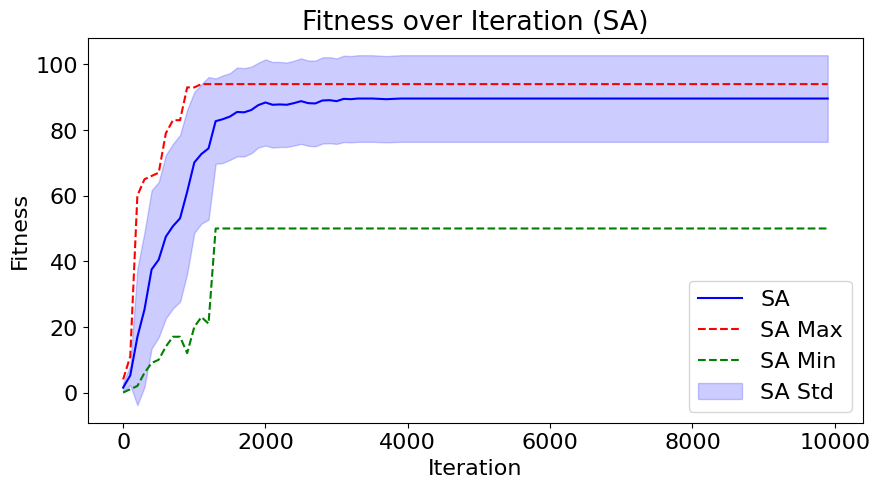

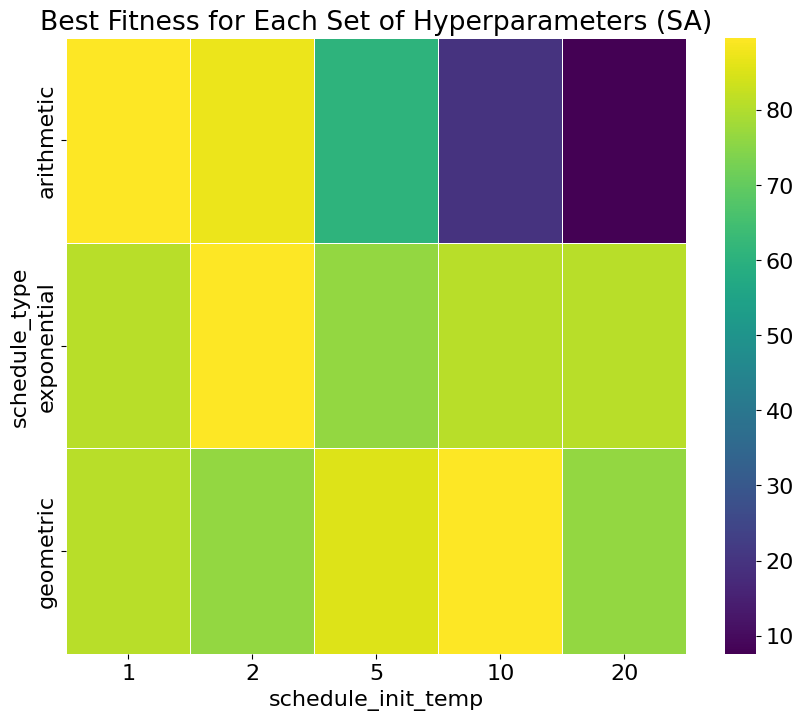

In [68]:
sa_hp_mean, sa_hp_std, sa_hp_min, sa_hp_max = runner_results_to_stats(sa_results)
sa_optimal_HP = get_optimal_hyperparameters(sa_hp_mean, ['schedule_init_temp', 'schedule_type'])
best_run = sa_hp_mean[(sa_hp_mean['schedule_init_temp'] == sa_optimal_HP['schedule_init_temp']) & (sa_hp_mean['schedule_type'] == sa_optimal_HP['schedule_type'])]
best_max = sa_hp_max[(sa_hp_mean['schedule_init_temp'] == sa_optimal_HP['schedule_init_temp']) & (sa_hp_mean['schedule_type'] == sa_optimal_HP['schedule_type'])]
best_std = sa_hp_std[(sa_hp_mean['schedule_init_temp'] == sa_optimal_HP['schedule_init_temp']) & (sa_hp_mean['schedule_type'] == sa_optimal_HP['schedule_type'])]
best_run_min = sa_hp_min[(sa_hp_mean['schedule_init_temp'] == sa_optimal_HP['schedule_init_temp']) & (sa_hp_mean['schedule_type'] == sa_optimal_HP['schedule_type'])]
print(sa_optimal_HP)
print(f'Best Fitness Avg: {best_run["Fitness"].max()}')
print(f'Best Fitness MAX: {best_max["Fitness"].max()}')
print(f'Best Iteration: {best_run["FEvals"].max()}')
print(f'Best Time: {best_run["Time"].max()}')
print(f'Best STD: {best_std["Fitness"].max()}')
# find the earlieest iteration where the fitness is the best and print it
print(f'Best Fitness Iteration: {best_max[best_max["Fitness"] == 94.0]["Iteration"].min()}')
# same but with the mean
print(f'Best Fitness Iteration: {best_run[best_run["Fitness"] == best_run["Fitness"].max()]["Iteration"].min()}')
plot_fitness_iteration(best_run, best_std, best_run_min, best_max, "SA", "TSP")
plot_HP_heatmap(sa_hp_mean, "schedule_init_temp", "schedule_type", "SA", "4PMedium")

### 3.3.3 SA Easy

In [ ]:
sa = SARunner(problem=problem_eeasy,
              experiment_name='sa',
              output_directory=None, # note: specify an output directory to have results saved to disk "experiments/TSP_SA_HP"
              seed=FIXED_SEED,
              iteration_list=np.arange(0, 10000, 100),
              max_attempts=300,
              temperature_list=[1,2,5,10,20],
              decay_list=[mlrose_hiive.GeomDecay, mlrose_hiive.ExpDecay, mlrose_hiive.ArithDecay])

sa_results = run_experiment_multi_seed(sa, [1,2,3,4,5,6,7,8,9,10])

import pickle
with open('experiments/4PEAKS_SA_HP_medium.pkl', 'wb') as f:
    pickle.dump(sa_results, f)
